In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [5]:
# Load datasets
df1 = pd.read_csv(r"D:\DIABETES\diabetes_prediction_dataset.csv")
df2 = pd.read_csv(r"D:\DIABETES\diabetes dataset.csv")


# Standardize column names
df1.rename(columns={"blood_glucose_level": "Glucose", "bmi": "BMI", "age": "Age", "diabetes": "Outcome"}, inplace=True)
df2.rename(columns={"BloodPressure": "Blood_Pressure", "SkinThickness": "Skin_Thickness", 
                     "DiabetesPedigreeFunction": "Diabetes_Pedigree_Function", "Outcome": "Outcome"}, inplace=True)

# Add missing columns with NaN for consistency
for col in df1.columns:
    if col not in df2.columns:
        df2[col] = None
for col in df2.columns:
    if col not in df1.columns:
        df1[col] = None

#
df1 = df1.dropna(axis=1, how='all')  # Remove all-NA columns in df1
df2 = df2.dropna(axis=1, how='all')  # Remove all-NA columns in df2

merged_df = pd.concat([df1, df2], ignore_index=True)

# Merge datasets
merged_df = pd.concat([df1, df2], ignore_index=True)
print("Datasets merged successfully!")

Datasets merged successfully!


In [6]:
merged_df

,gender,Age,hypertension,heart_disease,smoking_history,BMI,HbA1c_level,Glucose,Outcome,Pregnancies,Blood_Pressure,Skin_Thickness,Insulin,Diabetes_Pedigree_Function
0,Female,80.0,0.0,1.0,never,25.19,6.6,140,0,NaN,NaN,NaN,NaN,NaN
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80,0,NaN,NaN,NaN,NaN,NaN
2,Male,28.0,0.0,0.0,never,27.32,5.7,158,0,NaN,NaN,NaN,NaN,NaN
3,Female,36.0,0.0,0.0,current,23.45,5.0,155,0,NaN,NaN,NaN,NaN,NaN
4,Male,76.0,1.0,1.0,current,20.14,4.8,155,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,NaN,63.0,NaN,NaN,NaN,32.90,NaN,101,0,10.0,76.0,48.0,180.0,0.171
100764,NaN,27.0,NaN,NaN,NaN,36.80,NaN,122,0,2.0,70.0,27.0,0.0,0.340
100765,NaN,30.0,NaN,NaN,NaN,26.20,NaN,121,0,5.0,72.0,23.0,112.0,0.245
100766,NaN,47.0,NaN,NaN,NaN,30.10,NaN,126,1,1.0,60.0,0.0,0.0,0.349


In [7]:
num_duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 3854


In [8]:
# Get only the duplicate rows
duplicate_rows = merged_df[merged_df.duplicated(keep=False)]
# Display the first 10 duplicate rows
print(duplicate_rows.head(10))

    gender   Age  hypertension  heart_disease smoking_history    BMI  \
1   Female  54.0           0.0            0.0         No Info  27.32   
10  Female  53.0           0.0            0.0           never  27.32   
14  Female  76.0           0.0            0.0         No Info  27.32   
18  Female  42.0           0.0            0.0         No Info  27.32   
41    Male   5.0           0.0            0.0         No Info  27.32   
44  Female  67.0           0.0            0.0         No Info  27.32   
51  Female  26.0           0.0            0.0         No Info  27.32   
56    Male  30.0           0.0            0.0         No Info  27.32   
62  Female  30.0           0.0            0.0         current  27.32   
95    Male  19.0           0.0            0.0           never  27.32   

    HbA1c_level  Glucose  Outcome  Pregnancies  Blood_Pressure  \
1           6.6       80        0          NaN             NaN   
10          6.1       85        0          NaN             NaN   
14       

In [9]:
exact_duplicates = merged_df[merged_df.duplicated(keep=False)]
print(exact_duplicates.head(10))  # Show first 10 exact duplicates

    gender   Age  hypertension  heart_disease smoking_history    BMI  \
1   Female  54.0           0.0            0.0         No Info  27.32   
10  Female  53.0           0.0            0.0           never  27.32   
14  Female  76.0           0.0            0.0         No Info  27.32   
18  Female  42.0           0.0            0.0         No Info  27.32   
41    Male   5.0           0.0            0.0         No Info  27.32   
44  Female  67.0           0.0            0.0         No Info  27.32   
51  Female  26.0           0.0            0.0         No Info  27.32   
56    Male  30.0           0.0            0.0         No Info  27.32   
62  Female  30.0           0.0            0.0         current  27.32   
95    Male  19.0           0.0            0.0           never  27.32   

    HbA1c_level  Glucose  Outcome  Pregnancies  Blood_Pressure  \
1           6.6       80        0          NaN             NaN   
10          6.1       85        0          NaN             NaN   
14       

In [10]:
merged_df = merged_df.drop_duplicates()
print("Dataset dimensions:", merged_df.shape)

Dataset dimensions: (96914, 14)


In [11]:
# Fill numeric missing values with median
merged_df = merged_df.copy()  # avoid chained assignment issues

# Fill numeric columns with median
merged_df.fillna(merged_df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in merged_df.select_dtypes(include=['object']).columns:
    mode_value = merged_df[col].mode().iloc[0]
    merged_df[col] = merged_df[col].fillna(mode_value)


# Fill categorical missing values with most frequent value
for col in merged_df.select_dtypes(include=['object']).columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode().iloc[0])


In [12]:
print(merged_df.info())  # Displays column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
Index: 96914 entries, 0 to 100767
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      96914 non-null  object 
 1   Age                         96914 non-null  float64
 2   hypertension                96914 non-null  float64
 3   heart_disease               96914 non-null  float64
 4   smoking_history             96914 non-null  object 
 5   BMI                         96914 non-null  float64
 6   HbA1c_level                 96914 non-null  float64
 7   Glucose                     96914 non-null  int64  
 8   Outcome                     96914 non-null  int64  
 9   Pregnancies                 96914 non-null  float64
 10  Blood_Pressure              96914 non-null  float64
 11  Skin_Thickness              96914 non-null  float64
 12  Insulin                     96914 non-null  float64
 13  Diabetes_Pedigree_Function  96914 n

In [13]:
print(merged_df.head(10))  # Shows first 10 rows

   gender   Age  hypertension  heart_disease smoking_history    BMI  \
0  Female  80.0           0.0            1.0           never  25.19   
1  Female  54.0           0.0            0.0         No Info  27.32   
2    Male  28.0           0.0            0.0           never  27.32   
3  Female  36.0           0.0            0.0         current  23.45   
4    Male  76.0           1.0            1.0         current  20.14   
5  Female  20.0           0.0            0.0           never  27.32   
6  Female  44.0           0.0            0.0           never  19.31   
7  Female  79.0           0.0            0.0         No Info  23.86   
8    Male  42.0           0.0            0.0           never  33.64   
9  Female  32.0           0.0            0.0           never  27.32   

   HbA1c_level  Glucose  Outcome  Pregnancies  Blood_Pressure  Skin_Thickness  \
0          6.6      140        0          3.0            72.0            23.0   
1          6.6       80        0          3.0           

In [14]:
label_encoders = {}
for col in merged_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le  # Save encoders for future decoding

print("Categorical variables encoded successfully!")


Categorical variables encoded successfully!


In [15]:
merged_df

,gender,Age,hypertension,heart_disease,smoking_history,BMI,HbA1c_level,Glucose,Outcome,Pregnancies,Blood_Pressure,Skin_Thickness,Insulin,Diabetes_Pedigree_Function
0,0,80.0,0.0,1.0,4,25.19,6.6,140,0,3.0,72.0,23.0,30.5,0.3725
1,0,54.0,0.0,0.0,0,27.32,6.6,80,0,3.0,72.0,23.0,30.5,0.3725
2,1,28.0,0.0,0.0,4,27.32,5.7,158,0,3.0,72.0,23.0,30.5,0.3725
3,0,36.0,0.0,0.0,1,23.45,5.0,155,0,3.0,72.0,23.0,30.5,0.3725
4,1,76.0,1.0,1.0,1,20.14,4.8,155,0,3.0,72.0,23.0,30.5,0.3725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,0,63.0,0.0,0.0,4,32.90,5.8,101,0,10.0,76.0,48.0,180.0,0.1710
100764,0,27.0,0.0,0.0,4,36.80,5.8,122,0,2.0,70.0,27.0,0.0,0.3400
100765,0,30.0,0.0,0.0,4,26.20,5.8,121,0,5.0,72.0,23.0,112.0,0.2450
100766,0,47.0,0.0,0.0,4,30.10,5.8,126,1,1.0,60.0,0.0,0.0,0.3490


In [16]:
v1=merged_df[(merged_df["Outcome"]==1)]
v2=merged_df[(merged_df["Outcome"]==0)].sample(n=10000, random_state=42)

In [17]:
v1 = pd.concat([v1, v2], ignore_index=True)

In [18]:
v1

,gender,Age,hypertension,heart_disease,smoking_history,BMI,HbA1c_level,Glucose,Outcome,Pregnancies,Blood_Pressure,Skin_Thickness,Insulin,Diabetes_Pedigree_Function
0,0,44.0,0.0,0.0,4,19.31,6.5,200,1,3.0,72.0,23.0,30.5,0.3725
1,1,67.0,0.0,1.0,5,27.32,6.5,200,1,3.0,72.0,23.0,30.5,0.3725
2,1,50.0,1.0,0.0,1,27.32,5.7,260,1,3.0,72.0,23.0,30.5,0.3725
3,1,73.0,0.0,0.0,3,25.91,9.0,160,1,3.0,72.0,23.0,30.5,0.3725
4,0,53.0,0.0,0.0,3,27.32,7.0,159,1,3.0,72.0,23.0,30.5,0.3725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,0,80.0,1.0,0.0,5,27.32,4.8,155,0,3.0,72.0,23.0,30.5,0.3725
18746,0,39.0,0.0,0.0,0,24.62,6.0,160,0,3.0,72.0,23.0,30.5,0.3725
18747,0,26.0,0.0,0.0,3,27.32,6.6,160,0,3.0,72.0,23.0,30.5,0.3725
18748,0,48.0,1.0,0.0,1,18.60,5.7,160,0,3.0,72.0,23.0,30.5,0.3725


In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(v1.drop(columns=["Outcome"]))  # Exclude target column

# Convert back to DataFrame
processed_df = pd.DataFrame(scaled_features, columns=v1.drop(columns=["Outcome"]).columns)
processed_df["Outcome"] = v1["Outcome"].values  # Re-add target variable

# Save the processed dataset
processed_df.to_csv("processed_diabetes_data.csv", index=False)
print("Data preprocessing complete! File saved as 'processed_diabetes_data.csv'")

Data preprocessing complete! File saved as 'processed_diabetes_data.csv'


In [20]:
processed_df

,gender,Age,hypertension,heart_disease,smoking_history,BMI,HbA1c_level,Glucose,Pregnancies,Blood_Pressure,Skin_Thickness,Insulin,Diabetes_Pedigree_Function,Outcome
0,-0.872482,-0.237510,-0.408375,-0.298713,0.845279,-1.334667,0.323179,0.705406,-0.051002,0.007596,0.008355,-0.058096,-0.053915,1
1,1.145657,0.820335,-0.408375,3.347690,1.401130,-0.265032,0.323179,0.705406,-0.051002,0.007596,0.008355,-0.058096,-0.053915,1
2,1.145657,0.038449,2.448728,-0.298713,-0.822274,-0.265032,-0.305289,1.780394,-0.051002,0.007596,0.008355,-0.058096,-0.053915,1
3,1.145657,1.096295,-0.408375,-0.298713,0.289428,-0.453319,2.287139,-0.011252,-0.051002,0.007596,0.008355,-0.058096,-0.053915,1
4,-0.872482,0.176429,-0.408375,-0.298713,0.289428,-0.265032,0.715971,-0.029169,-0.051002,0.007596,0.008355,-0.058096,-0.053915,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,-0.872482,1.418247,2.448728,-0.298713,1.401130,-0.265032,-1.012314,-0.100835,-0.051002,0.007596,0.008355,-0.058096,-0.053915,0
18746,-0.872482,-0.467477,-0.408375,-0.298713,-1.378125,-0.625583,-0.069613,-0.011252,-0.051002,0.007596,0.008355,-0.058096,-0.053915,0
18747,-0.872482,-1.065389,-0.408375,-0.298713,0.289428,-0.265032,0.401737,-0.011252,-0.051002,0.007596,0.008355,-0.058096,-0.053915,0
18748,-0.872482,-0.053537,2.448728,-0.298713,-0.822274,-1.429479,-0.305289,-0.011252,-0.051002,0.007596,0.008355,-0.058096,-0.053915,0


In [21]:
df = pd.read_csv("processed_diabetes_data.csv")

# Split data into features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split complete! Train size: {len(X_train)}, Test size: {len(X_test)}")


Data split complete! Train size: 15000, Test size: 3750


In [22]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.8773
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1994
           1       0.88      0.85      0.87      1756

    accuracy                           0.88      3750
   macro avg       0.88      0.88      0.88      3750
weighted avg       0.88      0.88      0.88      3750

--------------------------------------------------
Random Forest Accuracy: 0.9040
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1994
           1       0.91      0.88      0.90      1756

    accuracy                           0.90      3750
   macro avg       0.90      0.90      0.90      3750
weighted avg       0.90      0.90      0.90      3750

--------------------------------------------------
Gradient Boosting Accuracy: 0.9123
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1994
           1       0.91      0.9

In [23]:
# Define Voting Classifier with Soft Voting (Logistic Regression & KNN)
voting_clf = VotingClassifier(estimators=[
    ("Logistic Regression", models["Logistic Regression"]),
    ("KNN", models["KNN"])
], voting="soft")  # Use 'hard' for majority voting

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier (Logistic Regression & KNN) Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Voting Classifier (Logistic Regression & KNN) Accuracy: 0.8840
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1994
           1       0.89      0.86      0.87      1756

    accuracy                           0.88      3750
   macro avg       0.88      0.88      0.88      3750
weighted avg       0.88      0.88      0.88      3750



In [24]:
voting_clf = VotingClassifier(estimators=[
    ("Logistic Regression", models["Logistic Regression"]),
    ("KNN", models["KNN"])
], voting="hard")

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier (Logistic Regression & KNN) Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Voting Classifier (Logistic Regression & KNN) Accuracy: 0.8744
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1994
           1       0.92      0.80      0.86      1756

    accuracy                           0.87      3750
   macro avg       0.88      0.87      0.87      3750
weighted avg       0.88      0.87      0.87      3750



In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the ensemble with soft voting (since these models can output probabilities)
voting_clf_gbx = VotingClassifier(estimators=[
    ("Random Forest", models["Random Forest"]),
    ("Gradient Boosting", models["Gradient Boosting"]),
    ("XGBoost", models["XGBoost"])
], voting="soft")  # Use "soft" for better performance with probabilistic classifiers

# Train the ensemble model
voting_clf_gbx.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier (Random Forest, Gradient Boosting & XGBoost) Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Voting Classifier (Random Forest, Gradient Boosting & XGBoost) Accuracy: 0.8744
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1994
           1       0.92      0.80      0.86      1756

    accuracy                           0.87      3750
   macro avg       0.88      0.87      0.87      3750
weighted avg       0.88      0.87      0.87      3750



In [26]:
from sklearn.ensemble import StackingClassifier
# Create the stacking ensemble
stacked_clf = StackingClassifier(
    estimators=[
        ("Gradient Boosting", models["Gradient Boosting"]),
        ("XGBoost", models["XGBoost"]),
        ("Random Forest", models["Random Forest"])
    ],
    final_estimator=LogisticRegression(),
    passthrough=False,  # Set to True if you want original features + predictions
    cv=5
)

# Train the stacking model
stacked_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacked_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Stacking Classifier Accuracy: 0.9120
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1994
           1       0.91      0.90      0.91      1756

    accuracy                           0.91      3750
   macro avg       0.91      0.91      0.91      3750
weighted avg       0.91      0.91      0.91      3750



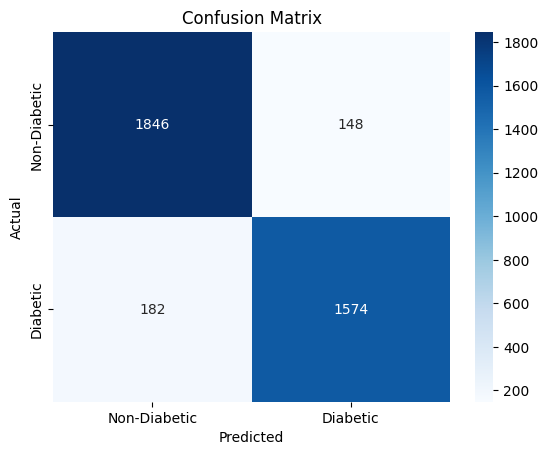

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


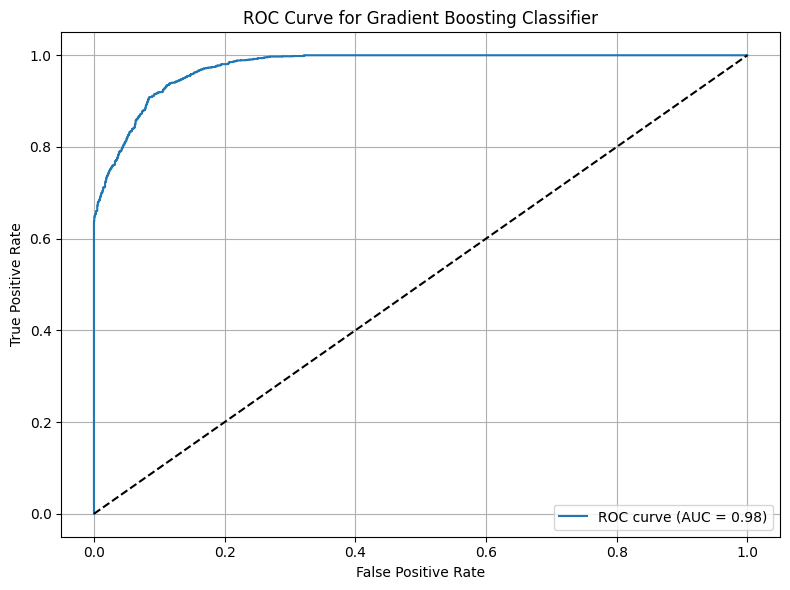

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming model is your Gradient Boosting Classifier and you've already trained it
y_score = model.predict_proba(X_test)[:, 1]  # Works with models that support `predict_proba`

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


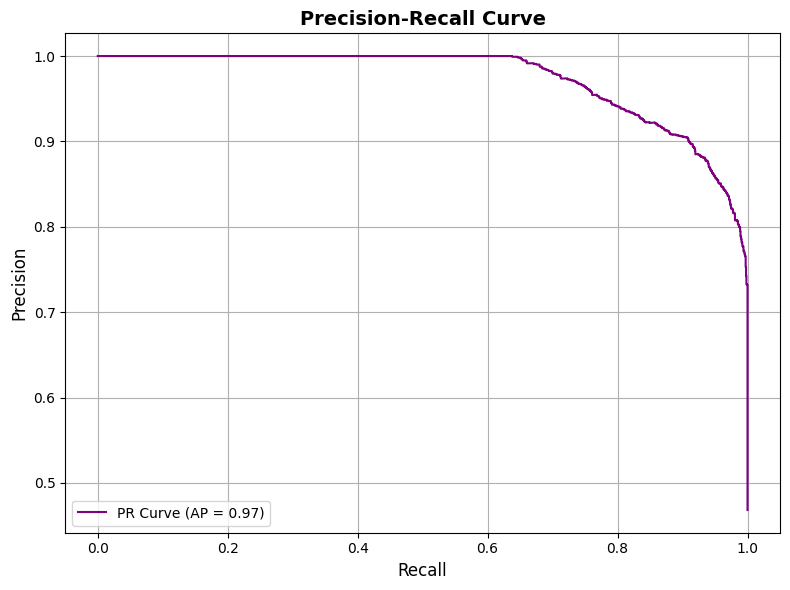

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities for the positive class (since your model is already trained)
y_score = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)

# Compute average precision
avg_precision = average_precision_score(y_test, y_score)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', color='purple')
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curve", fontsize=14, fontweight='bold')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
pip install adjustText


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


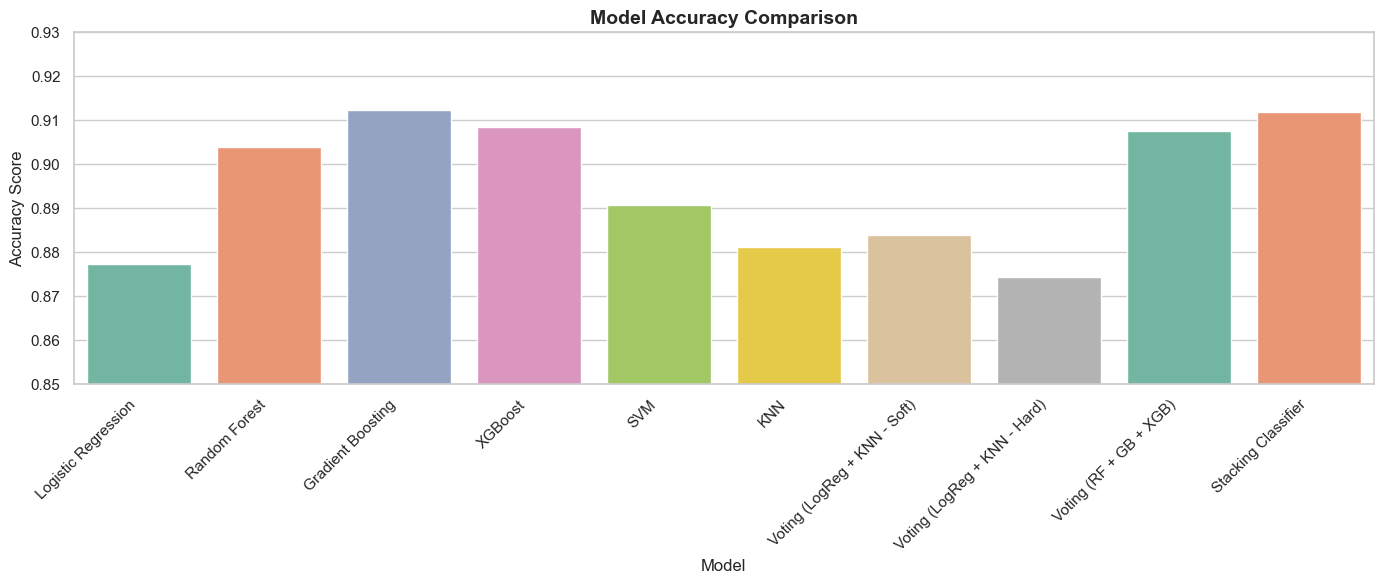

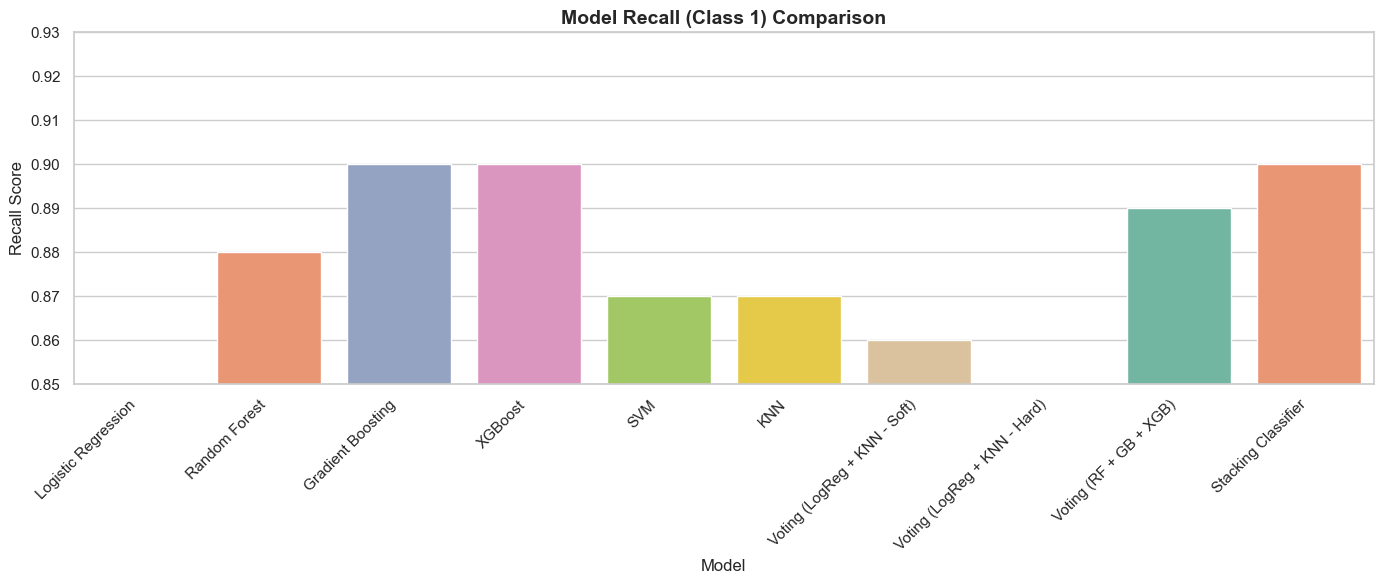

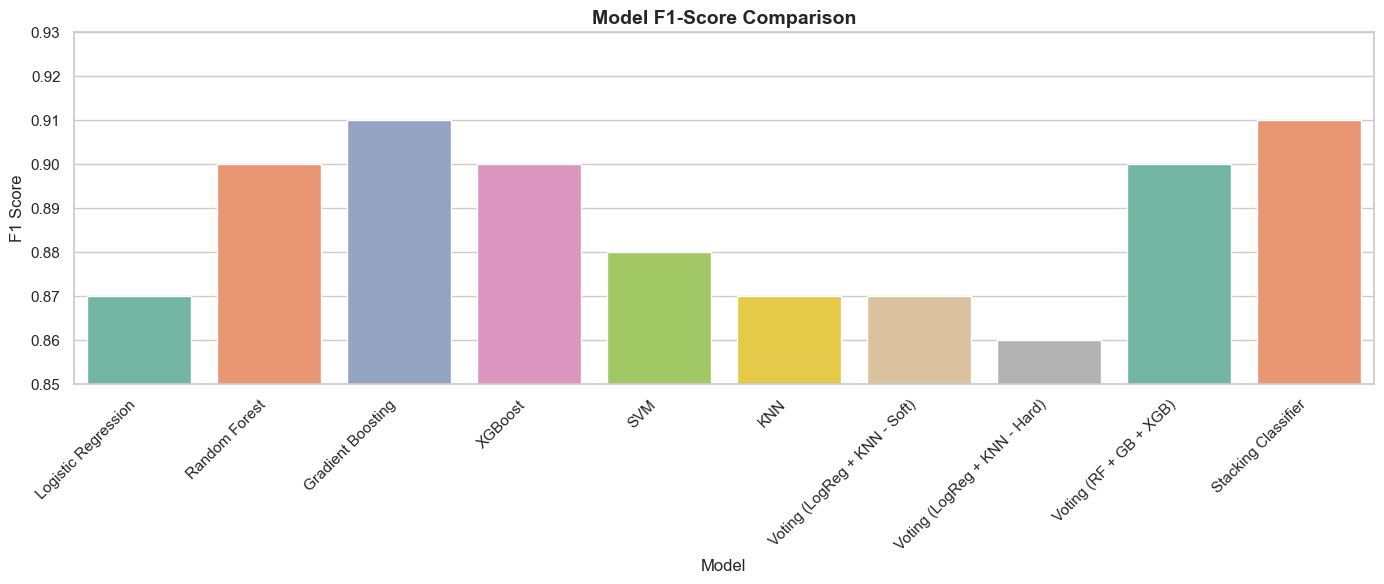

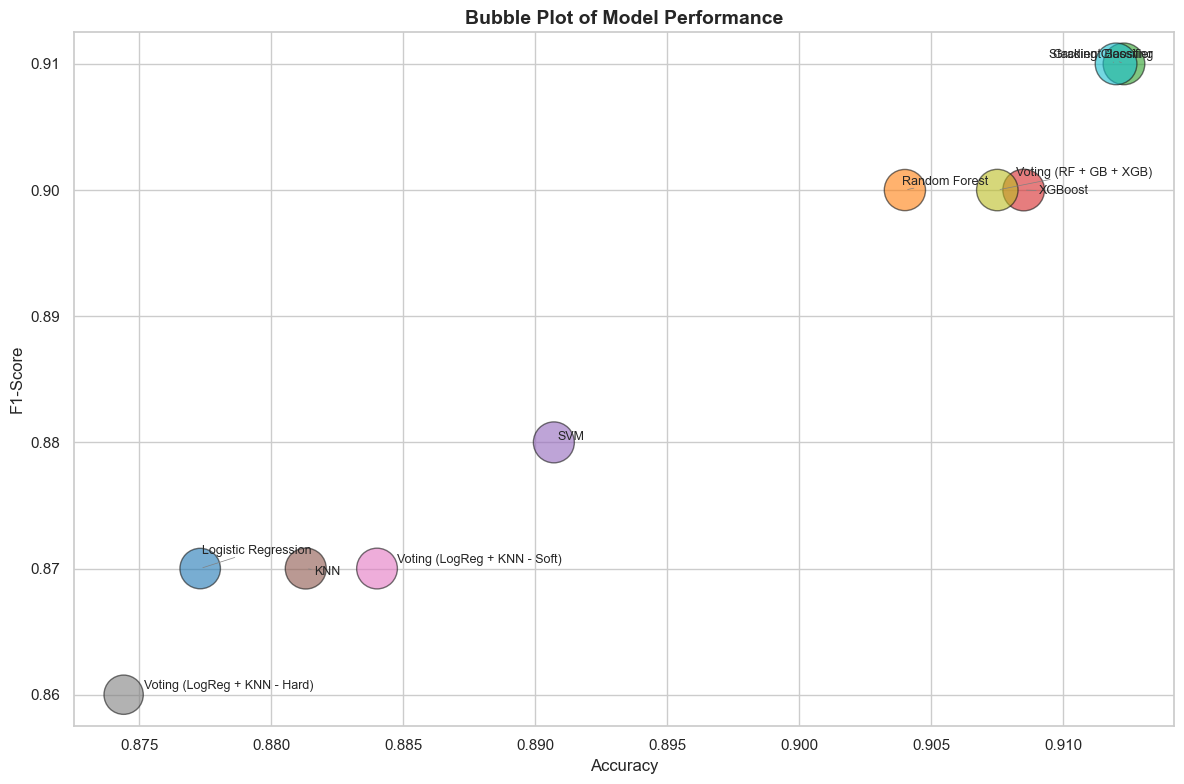

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text

# Final performance metrics
performance_data = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost",
        "SVM",
        "KNN",
        "Voting (LogReg + KNN - Soft)",
        "Voting (LogReg + KNN - Hard)",
        "Voting (RF + GB + XGB)",
        "Stacking Classifier"
    ],
    "Accuracy": [
        0.8773, 0.9040, 0.9123, 0.9085, 0.8907, 0.8813,
        0.8840, 0.8744, 0.9075, 0.9120
    ],
    "Recall": [
        0.85, 0.88, 0.90, 0.90, 0.87, 0.87,
        0.86, 0.80, 0.89, 0.90
    ],
    "F1-Score": [
        0.87, 0.90, 0.91, 0.90, 0.88, 0.87,
        0.87, 0.86, 0.90, 0.91
    ]
}

df = pd.DataFrame(performance_data)

# Set style
sns.set(style="whitegrid")
colors = sns.color_palette("Set2", len(df))

# Plot Accuracy
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="Model", y="Accuracy", hue="Model", palette=colors, dodge=False, legend=False)
plt.xticks(rotation=45, ha="right")
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy Score")
plt.ylim(0.85, 0.93)
plt.tight_layout()
plt.show()

# Plot Recall
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="Model", y="Recall", hue="Model", palette=colors, dodge=False, legend=False)
plt.xticks(rotation=45, ha="right")
plt.title("Model Recall (Class 1) Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Recall Score")
plt.ylim(0.85, 0.93)
plt.tight_layout()
plt.show()

# Plot F1-Score
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="Model", y="F1-Score", hue="Model", palette=colors, dodge=False, legend=False)
plt.xticks(rotation=45, ha="right")
plt.title("Model F1-Score Comparison", fontsize=14, fontweight='bold')
plt.ylabel("F1 Score")
plt.ylim(0.85, 0.93)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
bubble_sizes = df["Recall"] * 1000

# Scatter plot
scatter = plt.scatter(
    df["Accuracy"], df["F1-Score"],
    s=bubble_sizes, alpha=0.6, c=range(len(df)), cmap='tab10', edgecolors='k'
)

# Create label annotations and store them for adjustment
texts = []
for i in range(len(df)):
    texts.append(plt.text(
        df["Accuracy"][i], df["F1-Score"][i], df["Model"][i],
        fontsize=9
    ))

# Automatically adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.title("Bubble Plot of Model Performance", fontsize=14, fontweight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [33]:
joblib.dump(voting_clf_gbx, "voting_classifier_gbx_model.pkl")

['voting_classifier_gbx_model.pkl']

In [34]:
print(X.shape)  # This tells you how many features your model was trained on


(18750, 13)


In [36]:
print("Scaler expects:", scaler.n_features_in_)


Scaler expects: 13
